In [80]:

import QuantLib as ql
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
plt.style.use('seaborn-deep')
#date_today = datetime.today().strftime("%Y-%m-%d")
date_today = datetime(2023,1,11)
ql_date_today = ql.Date(date_today.strftime("%Y-%m-%d"), "%Y-%m-%d") #
ql.Settings.instance().evaluationDate = ql_date_today 
helpers = []
depositRates = 0.03218

depositMaturities =  "6M"
calendar = ql.Sweden()
fixingDays = 2
endOfMonth = False
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()

helpers.append(ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(depositRates)),
                ql.Period(depositMaturities), 
                fixingDays,
                calendar, 
                convention,
                endOfMonth,
                dayCounter))

bid_list= [3.51270, 3.45697, 3.29768, 3.18463, 3.10489, 3.06276, 3.03423,
3.00924, 2.99359, 2.97369, 2.94015, 2.87215, 2.76782, 2.54788]


ask_list = [3.53271, 3.48944, 3.33052, 3.21477, 3.13611, 3.09204, 3.06377,
3.03876, 3.01821, 3.00251, 2.96605, 2.90305, 2.79838, 2.57832]
mid = [(bid + ask)/2 for bid, ask in zip(bid_list,ask_list)]
def filter(val):
    return float(str(val)[0:7])

mid = list(map(filter, mid))
def ql_to_datetime(d):
    return datetime(d.year(), d.month(), d.dayOfMonth())
def calc_days(maturity, date_now = date_today):
    return  (maturity-date_now).days



fixedFrequency = ql.Annual
fixedConvention = ql.ModifiedFollowing
fixedDayCount = ql.Thirty360(ql.Thirty360.BondBasis)
#fixedDayCount = ql.Actual360(ql)
calendar = ql.TARGET()

tenor =['1Y', '2Y', '3Y', '4Y', 
        '5Y', '6Y', '7Y', '8Y', 
        '9Y', '10Y', '12Y','15Y',
        '20Y', '30Y']
index = ql.IborIndex('MyIndex', ql.Period('6M'), 0, ql.SEKCurrency(), calendar, ql.Following, True  , ql.Actual360())
iborIndex = index
for r,m in zip(mid, tenor):
    rate = ql.QuoteHandle(ql.SimpleQuote(r/100.0))
    tenor = ql.Period(m)
    temp_helper = ql.SwapRateHelper(rate, tenor, calendar, fixedFrequency, fixedConvention, fixedDayCount, iborIndex)
    helpers.append(temp_helper)
curve1 = ql.PiecewiseLinearZero(0, ql.TARGET(), helpers, ql.Actual365Fixed())
curve1.enableExtrapolation()

dates, rates = zip(*curve1.nodes())
dates = list(map(ql_to_datetime, dates))
days = list(map(calc_days, dates))
f = pd.DataFrame(dict({"Date": dates, "Rate": [depositRates*100] + [depositRates* 100] + mid,  "Zero Rate": rates, "Days" : days}))
f["Zero Rate"] = f["Zero Rate"]*100
f.iloc[1:, :]

,Date,Rate,Zero Rate,Days
1,2023-07-13,3.2180,3.236582,183
2,2024-01-11,3.5227,3.462073,365
3,2025-01-13,3.4732,3.408730,733
4,2026-01-12,3.3141,3.251694,1097
5,2027-01-11,3.1997,3.137876,1461
6,2028-01-11,3.1205,3.058762,1826
7,2029-01-11,3.0774,3.014758,2192
8,2030-01-11,3.0490,2.987021,2557
9,2031-01-13,3.0240,2.962234,2924
10,2032-01-12,3.0059,2.944384,3288


In [ ]:
mid

<AxesSubplot:xlabel='Date'>

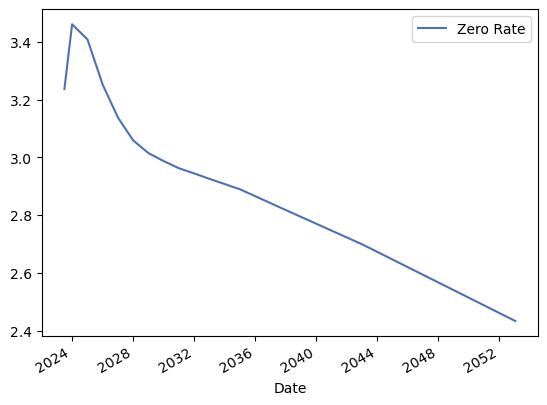

In [15]:
temp = f[["Date", "Zero Rate"]]
temp.set_index("Date", inplace=True)
temp.iloc[1:, :].plot()

In [46]:
import QuantLib as ql
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('default')
plt.style.use('seaborn-deep')
#date_today = datetime.today().strftime("%Y-%m-%d")
date_today = datetime(2022,12,30)
# Set the date today
ql_date_today = ql.Date(date_today.strftime("%Y-%m-%d"), "%Y-%m-%d") #
ql.Settings.instance().evaluationDate = ql_date_today 
helpers = []
depositRates = [0.02416*100, 0.02701*100]
depositMaturities = ['1D', '3M']
calendar = ql.Sweden()
fixingDays = 2
endOfMonth = False
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()
for r,m in zip(depositRates, depositMaturities):
    if m == '1D':
        fixingDays = 1 
        convention = ql.Following
    elif m == '3M':
        convention = ql.Following
        fixingDays = 2
    else:
        fixingDays = 2 
        convention = ql.ModifiedFollowing
    helpers.append(ql.DepositRateHelper(ql.QuoteHandle(ql.SimpleQuote(r/100.0)),
                    ql.Period(m), 
                    fixingDays,
                    calendar, 
                    convention,
                    endOfMonth,
                    dayCounter))
    
calendar = ql.TARGET()
index = ql.IborIndex('MyIndex', ql.Period('3M'), 2, ql.SEKCurrency(), calendar, ql.Following, True  , ql.Actual360())
rate = 0.0335
immOffsetStart = 1
immOffsetEnd = 2 
h = ql.FraRateHelper(rate, immOffsetStart, immOffsetEnd, index)
helpers.append(h)
fra = ['SEKFRAJUN23', 'SEKFRASEP23', 'SEKFRADEC23','SEKFRAMAR24',
       'SEKFRAJUN24', 'SEKFRASEP24', 'SEKFRADEC24','SEKFRAMAR25',
       'SEKFRAJUN25', 'SEKFRASEP25']
fraRates = [0.03645*100, 0.037*100, 0.0355*100, 0.0355*100,
            0.0346*100, 0.03355*100, 0.0319*100, 0.0317*100, 
            0.031*100, 0.03065*100, 0.03005*100]
fraStartEnd = [[2,5], [3,6], [4,7], [5,8],
               [6,9], [7,10], [8,11], [9,12],
               [10,13], [11,14], [12,15]]
fixingDays = 2
convention = ql.ModifiedFollowing
dayCounter = ql.Actual360()

for r,m in zip(fraRates, fraStartEnd):
    immOffsetStart = m[0]
    immOffsetEnd = m[1]
    helpers.append(ql.FraRateHelper(ql.QuoteHandle(ql.SimpleQuote(r/100.0)),
        immOffsetStart,     
        immOffsetEnd, 
        index))

def ql_to_datetime(d):
    return datetime(d.year(), d.month(), d.dayOfMonth())
def calc_days(maturity, date_now = date_today):
    return  (maturity-date_now).days
rate = ql.QuoteHandle(ql.SimpleQuote(0.0333))
tenor = ql.Period('4Y')
fixedFrequency = ql.Annual
fixedConvention = ql.ModifiedFollowing
fixedDayCount = ql.Thirty360(ql.Thirty360.BondBasis)
iborIndex = index
tenor =['4Y', '5Y', '6Y', '7Y', 
        '8Y', '9Y', '10Y', '12Y', 
        '15Y', '20Y', '25Y','30Y']
quotes = [3.33, 3.2775, 3.235, 3.205,
          3.1775, 3.1525, 3.1325, 3.095,
          3.0275, 2.92, 2.815, 2.6925]
for r,m in zip(quotes, tenor):
    rate = ql.QuoteHandle(ql.SimpleQuote(r/100.0))
    tenor = ql.Period(m)
    temp_helper = ql.SwapRateHelper(rate, tenor, calendar, fixedFrequency, fixedConvention, fixedDayCount, iborIndex)
    helpers.append(temp_helper)
curve1 = ql.PiecewiseLinearZero(0, ql.TARGET(), helpers, ql.Actual365Fixed())
curve1.enableExtrapolation()

dates, rates = zip(*curve1.nodes())
dates = list(map(ql_to_datetime, dates))
days = list(map(calc_days, dates))
actual_days = [0,4,94, 167, 265, 355,446,
               538, 629, 719, 809, 902, 993,
               1083, 1173, 1466, 1830, 2196, 2561,
               2926, 3293, 3657, 4387, 5484, 7311,
               9135, 10962]
df = pd.DataFrame(dict({"Date": dates, "Rate": rates, "Days" : days,"Actual Days": actual_days}))
df["Diff days"] = -df["Days"]  + df["Actual Days"]
with pd.option_context('display.float_format', '{:,.8f}'.format):
    display(df)


[3.5227,
 3.4732,
 3.3141,
 3.1997,
 3.1205,
 3.0774,
 3.049,
 3.024,
 3.0059,
 2.9881,
 2.9531,
 2.8876,
 2.7831,
 2.5631]

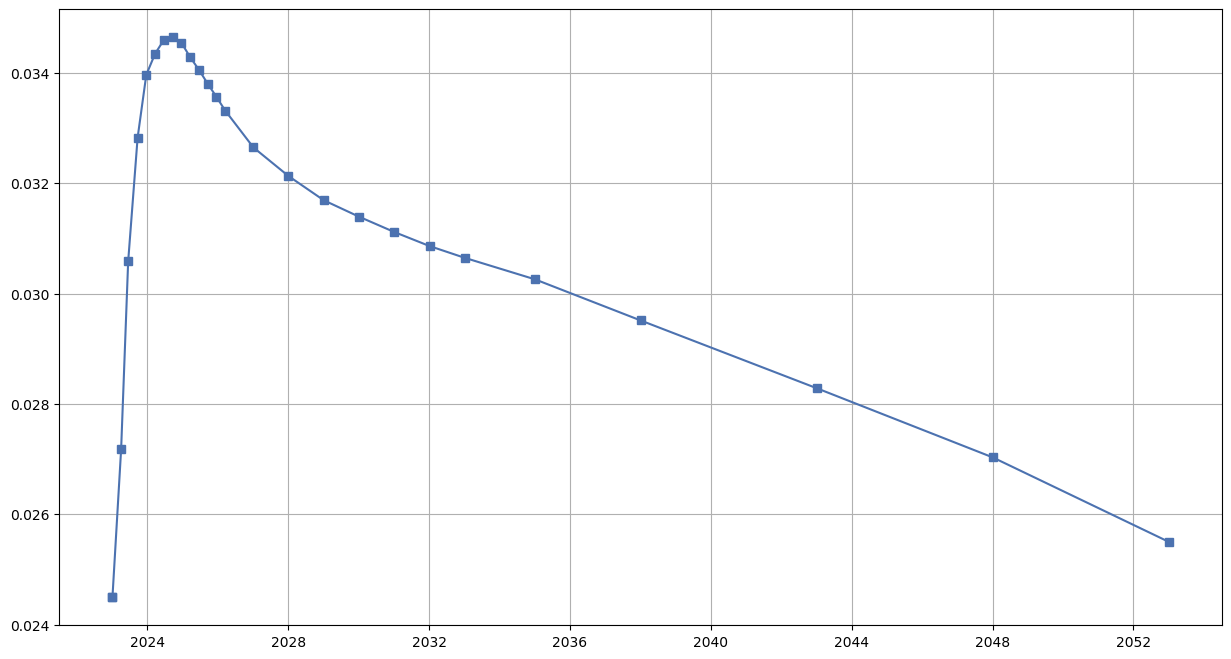

In [41]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(dates, rates, '-s')
ax.grid("True")

In [42]:
linear_days = [1,2,3,7,30, 90, 180, 270, 365, 730, 1095, 1460, 1825, 2555, 3285, 3650, 5475, 7300, 10950]
linear = np.interp(linear_days, days, rates)

In [43]:
pd.DataFrame(linear).to_clipboard()

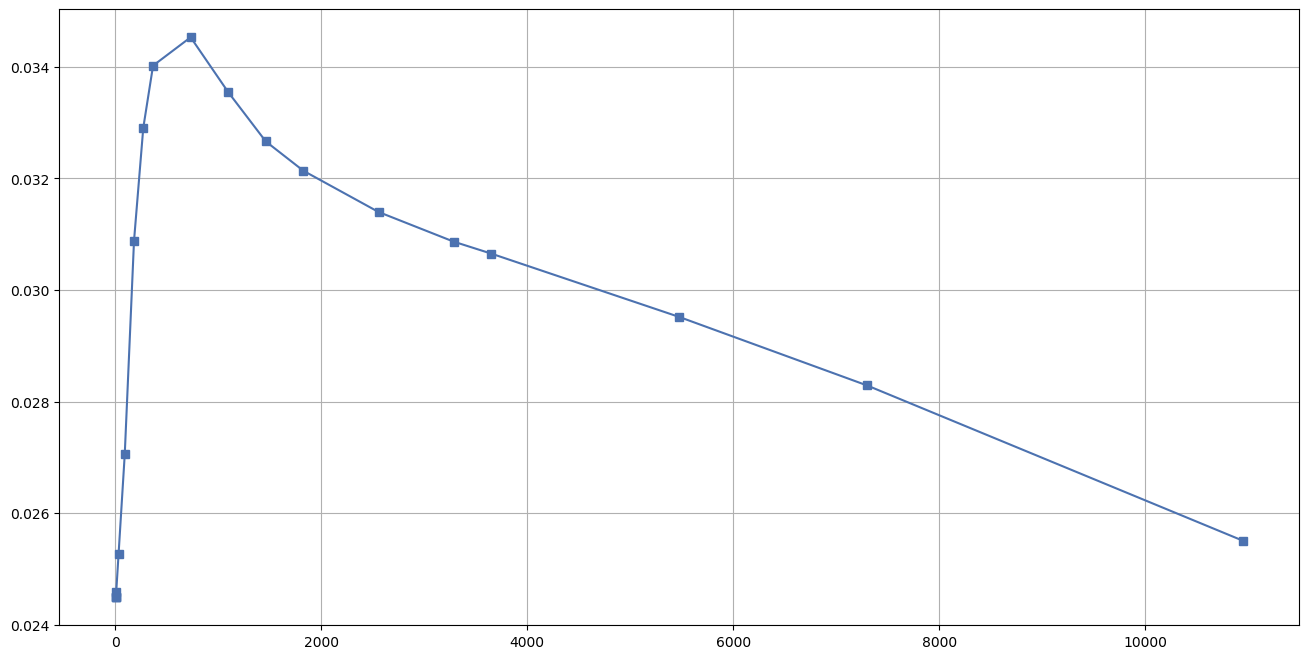

In [27]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(linear_days, linear, '-s')
ax.grid("True")